# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥—É–ª–µ–π –∏ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from tabulate import tabulate


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import AdditiveAttention, Concatenate
from tensorflow.keras.layers import TimeDistributed, Bidirectional, AdditiveAttention, Reshape
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Dropout, AdditiveAttention, GRU, RepeatVector, BatchNormalization

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


from tensorflow.python.framework.errors_impl import NotFoundError  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ

from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband

import os
import shutil
import json
import time

# –§–æ—Ä–º–∏—Ä—É–µ–º –±–∞–∑–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç df_calc_sec_2

In [5]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

# –ü—É—Ç—å –∫ —Ñ–∞–π–ª—É –¥–∞–Ω–Ω—ã—Ö .parquet
path = r"C:\Learn_project\Intern_1\data\df_calc_sec_2.parquet"

# –ß–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ Parquet-—Ñ–∞–π–ª–∞
df = pd.read_parquet(path)

# –í—ã–≤–µ–¥–µ–º –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ —Ç–∞–±–ª–∏—Ü—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
print(df.head())

          source_time  mode    value_14  value_10   value_16  value_10_lag_1  \
0 2024-04-07 03:21:30     1  156.200000  2.911765  38.863636        0.000000   
1 2024-04-07 03:22:00     1  155.714286  2.941176  38.855519        2.911765   
2 2024-04-07 03:22:30     1  155.000000  2.911765  38.863636        2.941176   
3 2024-04-07 03:23:00     1  154.000000  2.911765  38.863636        2.911765   
4 2024-04-07 03:23:30     1  154.000000  2.911765  38.863636        2.911765   

   value_10_lag_2  value_10_lag_3  value_10_lag_4  value_10_lag_5  ...  \
0        0.000000        0.000000        0.000000             0.0  ...   
1        0.000000        0.000000        0.000000             0.0  ...   
2        2.911765        0.000000        0.000000             0.0  ...   
3        2.941176        2.911765        0.000000             0.0  ...   
4        2.911765        2.941176        2.911765             0.0  ...   

   value_16_lag_6  value_16_diff_1  value_16_rolling_mean_3  \
0          

In [6]:
# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'mode' –∏ –Ω–∞–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 'value_14'
df = df.drop(columns=['mode'])

# –§—É–Ω–∫—Ü–∏–∏ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–§—É–Ω–∫—Ü–∏–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö

In [7]:
# –ì–ª–æ–±–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å–∫–µ–π–ª–µ—Ä–∞ –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
scaler = MinMaxScaler(feature_range=(0, 1))

# –§—É–Ω–∫—Ü–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
def normalize_data(values):
    """–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –¥–∞–Ω–Ω—ã–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω [0, 1]"""
    global scaler
    scaled_values = scaler.fit_transform(values.reshape(-1, 1))
    return scaled_values.flatten()

# –§—É–Ω–∫—Ü–∏—è –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
def denormalize_data(scaled_values):
    """–í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö"""
    global scaler
    original_values = scaler.inverse_transform(scaled_values.reshape(-1, 1))
    return original_values.flatten()

–§—É–Ω–∫—Ü–∏—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏

In [8]:
# –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
def prepare_data(arr, look_back=10, n_output_steps=120):
    """
    –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.
    :param arr: –ú–∞—Å—Å–∏–≤ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    :param look_back: –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –Ω–∞–∑–∞–¥ —Å–º–æ—Ç—Ä–∏—Ç –º–æ–¥–µ–ª—å
    :param n_output_steps: –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –≤–ø–µ—Ä–µ–¥ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å
    :return: –í—Ö–æ–¥–Ω—ã–µ (X) –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ (Y) –¥–∞–Ω–Ω—ã–µ
    """
    X, Y = [], []
    for i in range(len(arr)-look_back-n_output_steps+1):
        seq_in = arr[i:i+look_back]
        seq_out = arr[i+look_back:i+look_back+n_output_steps]
        X.append(seq_in)
        Y.append(seq_out)
    X_array = np.array(X)
    Y_array = np.array(Y)
    print("–§–æ—Ä–º—ã –ø–æ—Å–ª–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö:")
    print("X:", X_array.shape)
    print("Y:", Y_array.shape)
    return X_array, Y_array

–ê—Ä–∏—Ö—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏

In [9]:
# –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏
def create_attention_model(look_back, n_features, n_output_steps):
    inputs = Input(shape=(look_back, n_features))

    # –ö–æ–Ω–≤–æ–ª—é—Ü–∏–æ–Ω–Ω–∞—è —á–∞—Å—Ç—å –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    conv = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
    pool = MaxPooling1D(pool_size=2)(conv)

    # –ü–æ–¥–∫–ª—é—á–∞–µ–º—Å—è –∫ bi-LSTM
    lstm = Bidirectional(LSTM(128, return_sequences=True))(pool)
    drop = Dropout(0.2)(lstm)

    # –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–µ—Ö–∞–Ω–∏–∑–º–∞ –≤–Ω–∏–º–∞–Ω–∏—è
    attention = AdditiveAttention()([drop, drop])

    # –û–±—ã—á–Ω–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –¥–ª—è –ø—Ä—è–º–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    output = Dense(n_output_steps)(Flatten()(attention))

    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])
    return model

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [10]:
# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –¥–∞—Ç
start_date = '2024-06-01'
end_date = '2024-09-01'

# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –ø–µ—Ä–∏–æ–¥–æ–º –æ–±—É—á–µ–Ω–∏—è
df = df[(df['source_time'] >= start_date) & (df['source_time'] <= end_date)]

# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'mode' –∏ –Ω–∞–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 'value_14'
#df = df.drop(columns=['mode'])


# –û—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏
look_back = 10            # –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –Ω–∞–∑–∞–¥ —Å–º–æ—Ç—Ä–∏–º
n_features = 1            # –í—Å–µ–≥–æ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ (–æ–¥–Ω–æ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞)
#lags = [20, 30, 40, 60, 90, 120]  # –õ–∞–≥–∏ –¥–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
lags = [20]               # 10 –º–∏–Ω.
step = 2                  # –º–∞—Å—à—Ç–∞–± –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –ª–∞–≥–∞

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
values = df["value_14"].values

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaled_values = normalize_data(values)

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

In [11]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ DataFrame
df_test = pd.read_parquet(path)

# –£–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü 'mode' –∏ –≤—ã–±–∏—Ä–∞–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ 'value_14'
df_test = df_test.drop(columns=['mode'])

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –¥–∞—Ç
start_date = '2024-10-01'
end_date = '2024-12-01'

# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç –ø–æ —É–∫–∞–∑–∞–Ω–Ω–æ–º—É –ø–µ—Ä–∏–æ–¥—É
df_test = df_test[(df_test['source_time'] >= start_date) & (df_test['source_time'] <= end_date)]

# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—É—é –∫–æ–ª–æ–Ω–∫—É value_14 –¥–ª—è –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è
values_to_scale = df_test['value_14'].values.reshape(-1, 1)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
test_scaled_values = scaler.transform(df_test['value_14'].values.reshape(-1, 1)).ravel()

# –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def prepare_test_data(values, look_back, lag):
    dataX, dataY = [], []
    for i in range(len(values)-look_back-lag+1):
        a = values[i:(i + look_back)]
        b = values[(i + look_back):(i + look_back + lag)]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

–§—É–Ω–∫—Ü–∏—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

In [12]:
def evaluate_validation_set(model, X_val, Y_val, lag, denormalize_data):

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
    predicted_values = model.predict(X_val)

    # –†–∞–∑–≤—ë—Ä—Ç—ã–≤–∞–µ–º –∏ –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ
    y_true_denorm = denormalize_data(Y_val.flatten())
    y_pred_denorm = denormalize_data(predicted_values.flatten())

    # –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–±–æ–ª—å—à—É—é –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å
    epsilon = 1e-8
    y_true_adjusted = np.where(y_true_denorm != 0, y_true_denorm, epsilon)

    # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω—é—é –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –æ—à–∏–±–∫—É (RMAE)
    relative_errors = np.abs((y_true_adjusted - y_pred_denorm)) / y_true_adjusted
    mean_relative_error = relative_errors.mean()

    # –ú–µ–¥–∏–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ (Median Relative Error)
    median_re = np.median(relative_errors)

    # –†–∞—Å—á—ë—Ç MAE
    mae_score = mean_absolute_error(y_true_denorm, y_pred_denorm)

    # –ú–µ–¥–∏–∞–Ω–Ω–∞—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (Median Absolute Error)
    median_ae = median_absolute_error(y_true_denorm, y_pred_denorm)

    # –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print('\n–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:')
    print("\n–§–æ—Ä–º–∞ –∏—Ç–æ–≥–æ–≤–æ–π –æ—Ü–µ–Ω–∫–∏:")
    print("–§–æ—Ä–º–∞ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ Y_val:", Y_val.flatten().shape)
    print("–§–æ—Ä–º–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:", predicted_values.flatten().shape)
    print(f'\n–°—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (MAE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {mae_score:.4f}')
    print(f"–ú–µ–¥–∏–∞–Ω–∞ –∞–±—Å–æ–ª—é—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è (Median AE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {median_ae:.4f}")
    print(f'–°—Ä–µ–¥–Ω—è—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (RMAE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {mean_relative_error:.4%}\n')
    print(f"–ú–µ–¥–∏–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ (Median RE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:: {median_re:.4%}\n")

# –í—ã–∑–æ–≤ —Ñ—É–Ω–∫—Ü–∏–∏
# evaluate_validation_set(model, X_val, Y_val, lag, denormalize_data)

–§—É–Ω–∫—Ü–∏—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [13]:
def evaluate_test_set(model, test_scaled_values, look_back, lag, denormalize_data):

    # –ü–æ–¥–≥–æ—Ç–æ–≤–ª–∏–≤–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä
    test_X, test_Y = prepare_test_data(test_scaled_values, look_back, lag)

    # –ü—Ä–∏–≤–æ–¥–∏–º test_X –∫ –Ω—É–∂–Ω–æ–π —Ñ–æ—Ä–º–µ
    test_X = test_X.reshape(-1, look_back, 1)

    # –§–æ—Ä–º–∏—Ä—É–µ–º –æ—Ç—á—ë—Ç –æ —Ñ–æ—Ä–º–µ –¥–∞–Ω–Ω—ã—Ö
    print("\n–§–æ—Ä–º–∞ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö:")
    print("test_X:", test_X.shape)
    print("test_Y:", test_Y.shape)

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
    test_predictions = model.predict(test_X)

    # –û–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫ –æ—Ä–∏–≥–∏–Ω–∞–ª—É
    Y_test_true_denorm = denormalize_data(test_Y.flatten())
    Y_test_pred_denorm = denormalize_data(test_predictions.flatten())

    # –ú–µ–¥–∏–∞–Ω–Ω–∞—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (Median Absolute Error)
    test_median_ae = median_absolute_error(Y_test_true_denorm, Y_test_pred_denorm)

    # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω—é—é –∞–±—Å–æ–ª—é—Ç–Ω—É—é –æ—à–∏–±–∫—É (MAE)
    test_mae_score = mean_absolute_error(Y_test_true_denorm, Y_test_pred_denorm)

    # –û—Ü–µ–Ω–∏–≤–∞–µ–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –æ—à–∏–±–∫—É (RMAE)
    epsilon = 1e-8
    test_y_true_adjusted = np.where(Y_test_true_denorm != 0, Y_test_true_denorm, epsilon)
    test_relative_errors = np.abs((test_y_true_adjusted - Y_test_pred_denorm)) / test_y_true_adjusted
    test_mean_relative_error = test_relative_errors.mean()

    # –ú–µ–¥–∏–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ (Median Relative Error)
    test_median_re = np.median(test_relative_errors)

    # –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print("\n–§–æ—Ä–º–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ")
    print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:", test_predictions.shape)

    # –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—Ü–µ–Ω–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
    print("\n–§–æ—Ä–º—ã –∏—Ç–æ–≥–æ–≤–æ–π –æ—Ü–µ–Ω–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö:")
    print("–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ:", test_Y.flatten().shape)
    print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:", test_predictions.flatten().shape)
    print(f"\n–°—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (MAE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: {test_mae_score:.4f}")
    print(f"–ú–µ–¥–∏–∞–Ω–∞ –∞–±—Å–æ–ª—é—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è (Median AE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: {test_median_ae:.4f}")
    print(f"–°—Ä–µ–¥–Ω—è—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ (RMAE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: {test_mean_relative_error:.4%}\n")
    print(f"–ú–µ–¥–∏–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ (Median RE) –¥–ª—è –ª–∞–≥–æ–≤ {lag} –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: {test_median_re:.4%}\n")


# –í—ã–∑–æ–≤ —Ñ—É–Ω–∫—Ü–∏–∏
# evaluate_test_set(model, test_scaled_values, look_back, lag, denormalize_data)

–§—É–Ω–∫—Ü–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∞–≤—Ç–æ–ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [14]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –¥–ª—è —á–µ–∫–ø–æ–∏–Ω—Ç–æ–≤ –∏ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–∞–ø–æ–∫
CHECKPOINT_DIR = './checkpoints/'
TUNING_RESULTS_FILE = 'tuning_results.json'
MODEL_CHECKPOINT_PATH = CHECKPOINT_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'



# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (–∏–ª–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—É—Å—Ç—ã–µ, –µ—Å–ª–∏ –Ω–µ—Ç)
def load_tuning_state():
    try:
        with open(TUNING_RESULTS_FILE, 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        return {"current_lag": 0}

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
def save_tuning_state(data):
    with open(TUNING_RESULTS_FILE, 'w') as file:
        json.dump(data, file, indent=4)

# –§—É–Ω–∫—Ü–∏—è –∑–∞–≥—Ä—É–∑–∫–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏
previous_state = load_tuning_state()
current_lag_idx = previous_state["current_lag"]

# –ú–æ–¥–µ–ª—å ‚Ññ2_–∞–≤—Ç–æ

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import Hyperband
from kerastuner.engine.hypermodel import HyperModel
from keras.layers import *
from keras.models import Sequential, Model
from keras.regularizers import l2
from datetime import datetime
import numpy as np
import os
import time
import json


# Custom Callback –¥–ª—è –≤—Å—Ç–∞–≤–∫–∏ –ø–∞—É–∑—ã –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–∏
class EpochPauseCallback(tf.keras.callbacks.Callback):
    def __init__(self, pause_time=5):
        super(EpochPauseCallback, self).__init__()
        self.pause_time = pause_time  # –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–∞—É–∑—ã –≤ —Å–µ–∫—É–Ω–¥–∞—Ö

    def on_epoch_end(self, epoch, logs=None):
        print(f"\nüö® –≠–ø–æ—Ö–∞ {epoch + 1} –∑–∞–≤–µ—Ä—à–µ–Ω–∞. üõå –ü–∞—É–∑–∞ –Ω–∞ {self.pause_time} —Å–µ–∫—É–Ω–¥.\n")
        time.sleep(self.pause_time)
        print(f"‚úÖ –ü–∞—É–∑–∞ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å. –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ!\n")


# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è —Ç—é–Ω–µ—Ä–∞
def save_tuner_state(tuner, file_path):
    """–°–æ—Ö—Ä–∞–Ω—è–µ—Ç —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Ç—é–Ω–µ—Ä–∞."""
    state = {
        'trials': len(tuner.oracle.trials),
        'best_trial_id': tuner.oracle.get_best_trials()[0].trial_id
    }
    with open(file_path, 'w') as file:
        json.dump(state, file)


# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è
def load_tuner_state(file_path):
    """–ó–∞–≥—Ä—É–∂–∞–µ—Ç —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Ç—é–Ω–µ—Ä–∞."""
    try:
        with open(file_path, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        return None


# –ù–æ–≤–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏
def create_attention_model(hp, look_back, n_features, n_output_steps):
    inputs = Input(shape=(look_back, n_features))

    # –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    filters_1 = hp.Int('filters_1', min_value=32, max_value=512, step=24)
    kernel_size_1 = hp.Choice('kernel_size_1', values=[3, 5, 7])
    bi_lstm_units = hp.Int('bi_lstm_units', min_value=64, max_value=512, step=24)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    dense_units_1 = hp.Int('dense_units_1', min_value=64, max_value=1024, step=24)
    dense_units_2 = hp.Int('dense_units_2', min_value=64, max_value=512, step=24)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏
    conv = Conv1D(filters=filters_1, kernel_size=kernel_size_1, padding='causal', activation='relu')(inputs)
    pool = MaxPooling1D(pool_size=2)(conv)
    lstm = Bidirectional(LSTM(bi_lstm_units, return_sequences=True))(pool)
    drop = Dropout(dropout_rate)(lstm)
    attention = AdditiveAttention()([drop, drop])
    spatially_enriched_context = Concatenate(axis=-1)([pool, attention])
    dense_layer_1 = Dense(dense_units_1, activation="relu", kernel_regularizer=l2(0.01))(Flatten()(spatially_enriched_context))
    dense_layer_2 = Dense(dense_units_2, activation="relu", kernel_regularizer=l2(0.01))(dense_layer_1)
    combined = Concatenate(axis=-1)([Flatten()(attention), dense_layer_2])
    output = Dense(n_output_steps)(combined)

    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['mae'])
    return model


# –ö–ª–∞—Å—Å HyperModel –¥–ª—è Keras Tuner
class AttentionHyperModel(HyperModel):
    def __init__(self, look_back, n_features, n_output_steps):
        self.look_back = look_back
        self.n_features = n_features
        self.n_output_steps = n_output_steps

    def build(self, hp):
        return create_attention_model(hp, self.look_back, self.n_features, self.n_output_steps)




# –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
for lag in lags:
    print(f"\n\n===== –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –ª–∞–≥–æ–º {lag} ({lag // step} –º–∏–Ω—É—Ç) =====")

    # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    X, Y = prepare_data(scaled_values, look_back, lag)
    X = X.reshape((X.shape[0], X.shape[1], 1))  # –ï—Å–ª–∏ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫

    # –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é —á–∞—Å—Ç–∏
    split_point = int(len(X) * 0.8)
    X_train, X_val = X[:split_point], X[split_point:]
    Y_train, Y_val = Y[:split_point], Y[split_point:]

    # –ù–∞—Å—Ç—Ä–æ–∏–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    hypermodel = AttentionHyperModel(look_back, 1, Y_train.shape[1])  # –û–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ (–º–æ–∂–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å)

    # –î–∏—Ä–µ–∫—Ç–æ—Ä–∏—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    results_dir = 'search_results'
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    state_file = f'{results_dir}/tuner_state_lag_{lag}.json'

    # –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è, –µ—Å–ª–∏ –æ–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
    previous_state = load_tuner_state(state_file)

    # –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç Hyperband –¥–ª—è –ø–æ–∏—Å–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    tuner = Hyperband(
        hypermodel,
        objective='val_mae',
        max_epochs=50,
        factor=4,
        directory=f'tuning_{lag}_NEW',
        project_name=f'attention_model_lag_{lag}',
        overwrite=False  # –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø–æ–∏—Å–∫
    )

    # –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∑–∞–ø—É—Å–∫–∞
    if previous_state is not None:
        print(f"–ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Å–µ—Å—Å–∏–∏.")
        tuner.reload()  # –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ
    else:
        print(f"–°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.")

    # –ó–∞–ø—É—Å–∫–∞–µ–º –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–∏—Å–∫–∞ –ª—É—á—à–∏—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    tuner.search(
        X_train, Y_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_val, Y_val),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            EpochPauseCallback(pause_time=10)  # –ü–∞—É–∑–∞ –º–µ–∂–¥—É —ç–ø–æ—Ö–∞–º–∏
        ]
    )

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Ç—é–Ω–µ—Ä–∞
    save_tuner_state(tuner, state_file)

    # –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("\n–õ—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
    for key, value in best_hp.values.items():
        print(f"{key}: {value}")

    # –°—Ç—Ä–æ–∏–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–æ–¥–µ–ª—å —Å –Ω–∞–∏–ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    final_model = hypermodel.build(best_hp)

    # –ü–µ—Ä–µ–ø–æ–¥–±–∏—Ä–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–æ–¥–µ–ª—å
    final_history = final_model.fit(
        X_train, Y_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_val, Y_val),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            EpochPauseCallback(pause_time=10)  # –ü–∞—É–∑–∞ –º–µ–∂–¥—É —ç–ø–æ—Ö–∞–º–∏
        ],
        verbose=1
    )

    # –û—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    evaluate_validation_set(final_model, X_val, Y_val, lag, denormalize_data)

    # –ì–æ—Ç–æ–≤–∏–º—Å—è –∫ –æ—Ü–µ–Ω–∫–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    test_X, _ = prepare_test_data(test_scaled_values, look_back, lag)
    test_X = test_X.reshape((-1, look_back, 1))

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    predictions = final_model.predict(test_X)
    test_predictions_denorm = denormalize_data(predictions)
    evaluate_test_set(final_model, test_scaled_values, look_back, lag, denormalize_data)

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–æ–¥–µ–ª—å
    final_model.save(f'final_model_lag_{lag}.h5')

Trial 44 Complete [01h 51m 45s]
val_mae: 0.05239036679267883

Best val_mae So Far: 0.05239036679267883
Total elapsed time: 6d 05h 23m 27s

–õ—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
filters_1: 512
kernel_size_1: 5
bi_lstm_units: 184
dropout_rate: 0.1
dense_units_1: 352
dense_units_2: 208
learning_rate: 0.00016825922773820587
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Epoch 1/50
3312/3312 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 117ms/step - loss: 1.1006 - mae: 0.0757
üö® –≠–ø–æ—Ö–∞ 1 –∑–∞–≤–µ—Ä—à–µ–Ω–∞. üõå –ü–∞—É–∑–∞ –Ω–∞ 10 —Å–µ–∫—É–Ω–¥.

‚úÖ –ü–∞—É–∑–∞ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å. –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ!

3312/3312 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 421s 126ms/step - loss: 1.1003 - mae: 0.0757 - val_loss: 0.0108 - val_mae: 0.0582
Epoch 2/50
3312/3312 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 124ms/step - loss: 0.0108 - mae: 0.0570
üö® –≠–ø–æ—Ö–∞ 2 –∑–∞–≤–µ—Ä—à–µ–Ω–∞. üõå

–ú–µ–¥–∏–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –æ—à–∏–±–∫–∏ (Median RE) –¥–ª—è –ª–∞–≥–æ–≤ 20 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: 13.9584%



# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ –ø–æ–ª–Ω–æ–º —Ä—è–¥–µ –ª–∞–≥–æ–≤—ã—Ö —Å–¥–≤–∏–≥–æ–≤ –≤–ø–µ—Ä—ë–¥
- –¥–æ–æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –ª–∞–≥–æ–≤–æ–º —Å–¥–≤–∏–≥–µ 120

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving df_calc_sec_2.parquet to df_calc_sec_2.parquet


In [ ]:
# –ü–æ–¥–≥—Ä—É–∂–≤–µ–º df_14 –µ—Å–ª–∏ –±—ã–ª–æ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ—Ä—ã–≤–∞–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –∫–æ–ª–∞–±–∞
df = pd.read_parquet('/content/df_calc_sec_2.parquet')

# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'mode' –∏ –Ω–∞–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 'value_14'
df = df.drop(columns=['mode'])

In [ ]:
# –ì–ª–æ–±–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å–∫–µ–π–ª–µ—Ä–∞ –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
scaler = MinMaxScaler(feature_range=(0, 1))

# –§—É–Ω–∫—Ü–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
def normalize_data(values):
    """–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –¥–∞–Ω–Ω—ã–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω [0, 1]"""
    global scaler
    scaled_values = scaler.fit_transform(values.reshape(-1, 1))
    return scaled_values.flatten()

# –§—É–Ω–∫—Ü–∏—è –¥–µ–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
def denormalize_data(scaled_values):
    """–í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö"""
    global scaler
    original_values = scaler.inverse_transform(scaled_values.reshape(-1, 1))
    return original_values.flatten()

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
def prepare_data(arr, look_back=10, n_output_steps=120):
    """
    –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.
    :param arr: –ú–∞—Å—Å–∏–≤ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    :param look_back: –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –Ω–∞–∑–∞–¥ —Å–º–æ—Ç—Ä–∏—Ç –º–æ–¥–µ–ª—å
    :param n_output_steps: –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –≤–ø–µ—Ä–µ–¥ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å
    :return: –í—Ö–æ–¥–Ω—ã–µ (X) –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ (Y) –¥–∞–Ω–Ω—ã–µ
    """
    X, Y = [], []
    for i in range(len(arr)-look_back-n_output_steps+1):
        seq_in = arr[i:i+look_back]
        seq_out = arr[i+look_back:i+look_back+n_output_steps]
        X.append(seq_in)
        Y.append(seq_out)
    X_array = np.array(X)
    Y_array = np.array(Y)
    print("Shapes after preparation:")
    print("X:", X_array.shape)
    print("Y:", Y_array.shape)
    return X_array, Y_array

In [ ]:
# –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏
def create_attention_model(look_back, n_features, n_output_steps):
    inputs = Input(shape=(look_back, n_features))

    # –ö–æ–Ω–≤–æ–ª—é—Ü–∏–æ–Ω–Ω–∞—è —á–∞—Å—Ç—å –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    conv = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
    pool = MaxPooling1D(pool_size=2)(conv)

    # –ü–æ–¥–∫–ª—é—á–∞–µ–º—Å—è –∫ bi-LSTM
    lstm = Bidirectional(LSTM(128, return_sequences=True))(pool)
    drop = Dropout(0.2)(lstm)

    # –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–µ—Ö–∞–Ω–∏–∑–º–∞ –≤–Ω–∏–º–∞–Ω–∏—è
    attention = AdditiveAttention()([drop, drop])

    # –û–±—ã—á–Ω–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –¥–ª—è –ø—Ä—è–º–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    output = Dense(n_output_steps)(Flatten()(attention))

    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])
    return model

In [ ]:
# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –¥–∞—Ç
start_date = '2024-06-01'
end_date = '2024-10-01'

# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –ø–µ—Ä–∏–æ–¥–æ–º –æ–±—É—á–µ–Ω–∏—è
df = df[(df['source_time'] >= start_date) & (df['source_time'] <= end_date)]

# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'mode' –∏ –Ω–∞–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 'value_14'
#df = df.drop(columns=['mode'])


# –û—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏
look_back = 20            # –°–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –Ω–∞–∑–∞–¥ —Å–º–æ—Ç—Ä–∏–º
n_features = 1            # –í—Å–µ–≥–æ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ (–æ–¥–Ω–æ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞)
#lags = [20, 30, 40, 60, 90, 120]  # –õ–∞–≥–∏ –¥–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
lags = [120]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
values = df["value_14"].values

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaled_values = normalize_data(values)



===== –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –ª–∞–≥–æ–º 120 =====
Shapes after preparation:
X: (351222, 20)
Y: (351222, 120)

Shapes before training:
X_train: (280977, 20)
Y_train: (280977, 120)
X_val: (70245, 20)
Y_val: (70245, 120)
Epoch 1/50
4391/4391 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302s 67ms/step - loss: 0.0430 - mae: 0.1593 - val_loss: 0.0622 - val_mae: 0.1929
Epoch 2/50
4391/4391 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 315s 66ms/step - loss: 0.0386 - mae: 0.1494 - val_loss: 0.0593 - val_mae: 0.1979
Epoch 3/50
4391/4391 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291s 66ms/step - loss: 0.0382 - mae: 0.1483 - val_loss: 0.0594 - val_mae: 0.1916
Epoch 4/50
4391/4391 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290s 66ms/step - loss: 0.0377 - mae: 0.1473 - val_loss: 0.0603 - val_mae: 0.1881
Epoch 5/50
4391/4391 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 323s 66ms/step - loss: 0.0374 - mae: 0.1463

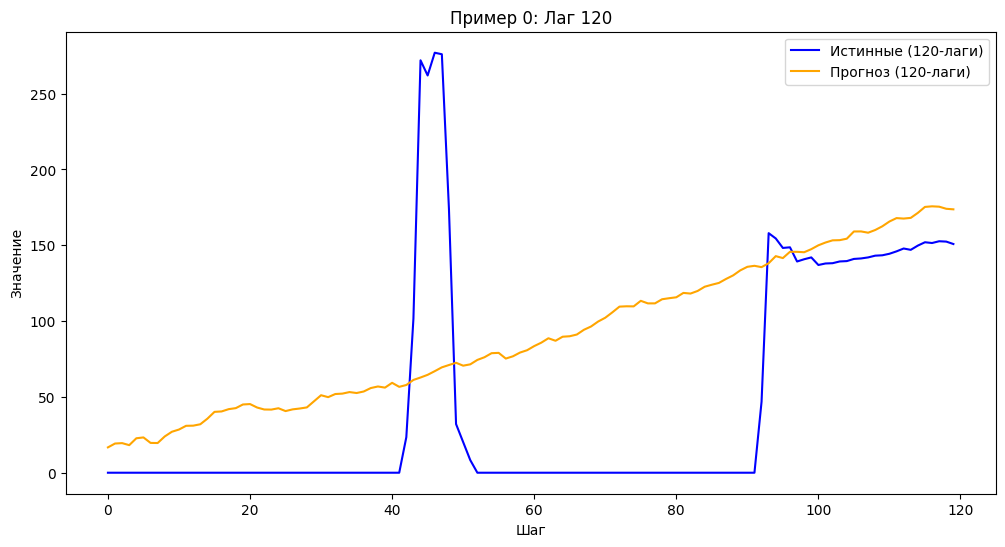

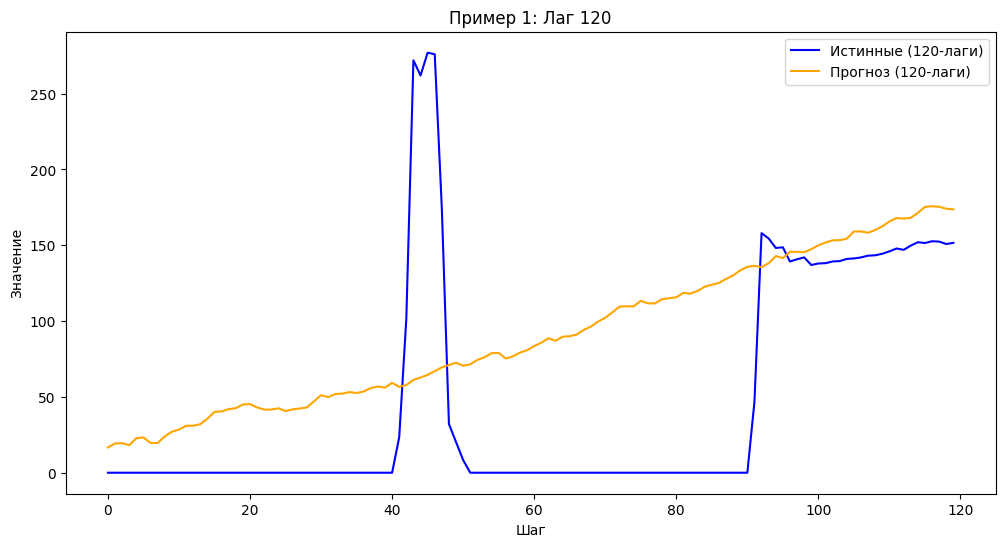

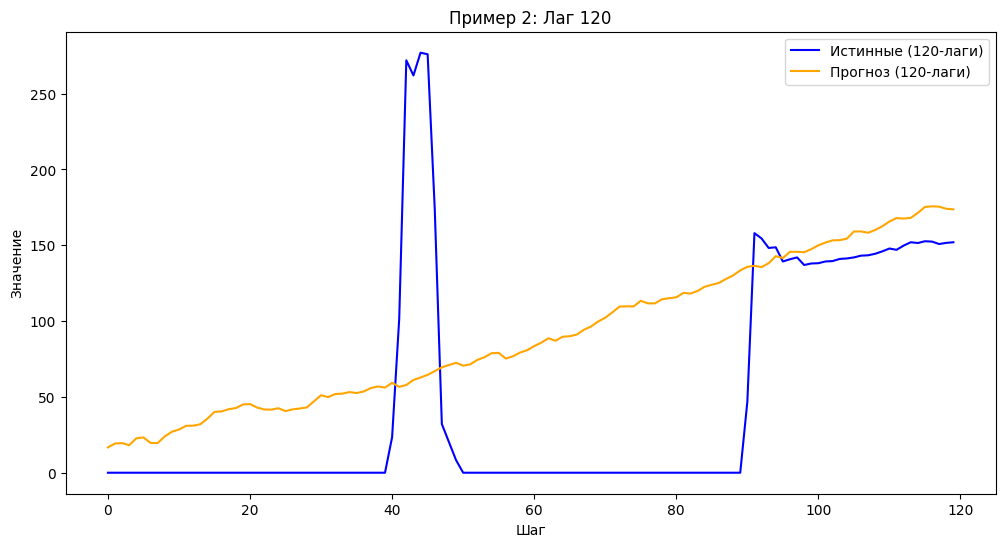

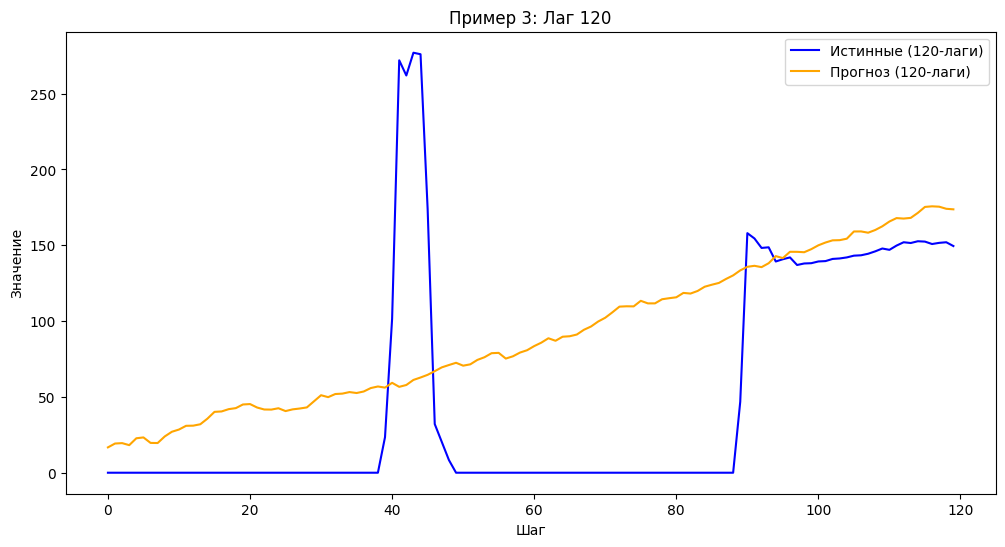

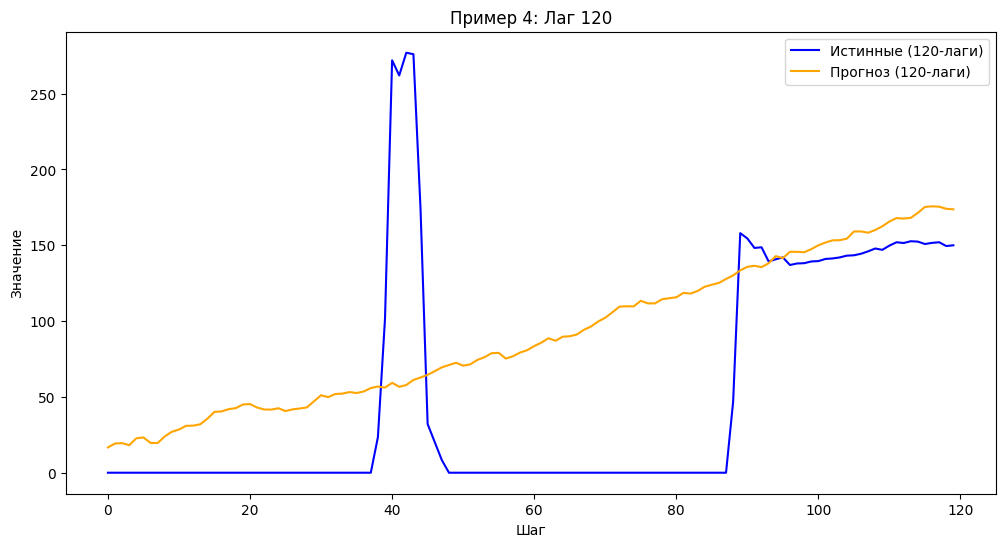

2196/2196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 15ms/step

Final evaluation shapes:
Y_val flattened: (8429400,)
Predicted values flattened: (8429400,)
–°—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (MAE) –¥–ª—è –ª–∞–≥–æ–≤ 120: 109.5358



In [ ]:
# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –ø–æ —Ä–∞–∑–Ω—ã–º –≤–µ–ª–∏—á–∏–Ω–∞–º –ª–∞–≥–æ–≤
for lag in lags:
    print(f"\n\n===== –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –ª–∞–≥–æ–º {lag} =====")

    # –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
    X, Y = prepare_data(scaled_values, look_back, lag)

    # –î–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
    split_point = int(len(X)*0.8)
    X_train, X_val = X[:split_point], X[split_point:]
    Y_train, Y_val = Y[:split_point], Y[split_point:]
    print("\nShapes before training:")
    print("X_train:", X_train.shape)
    print("Y_train:", Y_train.shape)
    print("X_val:", X_val.shape)
    print("Y_val:", Y_val.shape)

    # –°–æ–∑–¥–∞–¥–∏–º –º–æ–¥–µ–ª—å
    model = create_attention_model(look_back, n_features, lag)

    # –ù–∞—Å—Ç—Ä–æ–∏–º —Ä–∞–Ω–Ω—é—é –æ—Å—Ç–∞–Ω–æ–≤–∫—É
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    history = model.fit(
        X_train, Y_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # –ü—Ä–æ–≥–Ω–æ–∑ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    predictions = model.predict(X_val[:10])
    print("\nShapes after prediction:")
    print("Predictions:", predictions.shape)
    for idx in range(min(5, len(predictions))):
        true_values = Y_val[idx].flatten()
        pred_values = predictions[idx].flatten()

        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∫ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–π —à–∫–∞–ª–µ
        true_denorm = denormalize_data(true_values)
        pred_denorm = denormalize_data(pred_values)

        plt.figure(figsize=(12, 6))
        plt.plot(true_denorm, label=f'–ò—Å—Ç–∏–Ω–Ω—ã–µ ({lag}-–ª–∞–≥–∏)', color='blue')
        plt.plot(pred_denorm, label=f'–ü—Ä–æ–≥–Ω–æ–∑ ({lag}-–ª–∞–≥–∏)', color='orange')
        plt.xlabel('–®–∞–≥')
        plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
        plt.title(f'–ü—Ä–∏–º–µ—Ä {idx}: –õ–∞–≥ {lag}')
        plt.legend()
        plt.show()

    # –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏
    predicted_values = model.predict(X_val)
    print("\nFinal evaluation shapes:")
    print("Y_val flattened:", Y_val.flatten().shape)
    print("Predicted values flattened:", predicted_values.flatten().shape)
    mae_score = mean_absolute_error(denormalize_data(Y_val.flatten()), denormalize_data(predicted_values.flatten()))
    print(f"–°—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (MAE) –¥–ª—è –ª–∞–≥–æ–≤ {lag}: {mae_score:.4f}\n")